# Third Assignment 

---

> Nikolaos Antonopoulos <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> antonopoulosn@hotmail.com

## Getting ready 
* Firstly, we have to import some packages that will be needed. 

In [35]:
import numpy as np
import pandas as pd

## Obtaining the Data

In [36]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import re 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from plotnine import *

## Creating a Spotipy Object

In [37]:
client_id = "7b172c47988b4d2da267ad35a2a23d88"
client_secret = "bd980144781a436ca841e0d54187cd74"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

* We shall download a file with the tracks and their characteristics via Kaggle, and specifically this [link](https://www.kaggle.com/lehaknarnauli/spotify-datasets?select=tracks.csv).

In [38]:
songs=pd.read_csv('data/tracks.csv')

In [39]:
songs=songs.head(100000)

# mallon prepei na to kanw dummy, o kwdikas apo katw to ulopoiei se mia grammh 

In [40]:
# song_data["key"] = song_data["key"].astype("category")
# song_data = pd.get_dummies(song_data, columns=["key"])
# song_data.head()

* However, for the purposes of this assignment, we show the way we could do this by hand, if we had only the id's of each song 

In [41]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(songs, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
df_train.set_index('id',inplace=True)
df_test.set_index('id',inplace=True)

In [43]:
import sklearn
from sklearn import preprocessing

Takes as argument:  
1) the df songs 
2) a list with all the columns as strings that want to be dummies.  


In [44]:
def make_dummies(dataframe,to_be_dummy):
    dataframe = pd.get_dummies(
    dataframe,
    columns = to_be_dummy,
    sparse = False)
    return dataframe
dummies = ['key']


* Takes as argument a list with all the columns as strings that want to be scaled. 

In [45]:
def scaler(dataframe,to_be_scaled):
    scaler = sklearn.preprocessing.StandardScaler(copy = True)
    dataframe[to_be_scaled] = scaler.fit_transform(dataframe[to_be_scaled].to_numpy())
# to_be_scaled = ['popularity','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']
to_be_scaled = ['loudness','duration_ms','tempo']

In [46]:
def drop_columns(dataframe,to_be_deleted):
    dataframe.drop(to_be_deleted, axis=1, inplace=True)
to_be_deleted = ['id_artists', 'release_date','artists','name'] 

## TRAIN DATAFRAME 

In [47]:
drop_columns(df_train,to_be_deleted)#delete columns
scaler(df_train,to_be_scaled)

In [48]:
df_train

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
id,,,,,,,,,,,,,,,
0nbBWAWftxvrICGNtOEAq1,0,-0.294975,0,0.172,0.110,0,-1.373785,1,0.0425,0.280000,0.000017,0.2540,0.0368,0.052287,4
0ekMehNXQgeMJXfCPrlTTf,54,0.154010,0,0.705,0.729,1,0.677369,0,0.1310,0.029200,0.000410,0.3720,0.6310,-0.910130,4
14pU7KR5YqN8UQB2uO8Leg,13,1.286318,0,0.411,0.956,7,0.401075,1,0.1050,0.261000,0.217000,0.1940,0.0701,-0.479521,4
4g39mDwUrt6B1AbuQXahxv,45,-0.347292,0,0.681,0.529,4,0.363850,1,0.0601,0.655000,0.000000,0.0485,0.9390,0.180424,4
25KqkpoJP40Z4fj6WrzMFi,3,-0.353139,0,0.608,0.261,9,-0.491234,1,0.0316,0.931000,0.129000,0.1980,0.6720,-0.626786,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6i7IXg8j7ZngiEOgBYjkhw,59,0.702157,0,0.325,0.856,4,0.930172,0,0.1880,0.000319,0.007080,0.2570,0.6520,-1.540556,3
0cXGtTRfQKSHojilCoBAOd,65,0.441138,0,0.770,0.686,2,1.175927,1,0.0455,0.308000,0.000000,0.2740,0.5170,0.512978,4
4pUmQqaZklcCOB3rFdWc7g,65,0.435291,0,0.525,0.704,9,1.064976,0,0.0501,0.353000,0.000005,0.0743,0.8550,-0.597399,4


In [49]:
y_train = df_train.pop('valence')
X_train = df_train

In [50]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     4332.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:36:55   Log-Likelihood:                 16512.
No. Observations:               70000   AIC:                        -3.299e+04
Df Residuals:                   69985   BIC:                        -3.286e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2481      0.007  

Dropping liveness

In [51]:
X = X_train.drop('liveness', 1,)
# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Printing the summary of the model
# print(lr_2.summary())

C:\Users\3E30~1\AppData\Local\Temp/ipykernel_6360/1596609678.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [52]:
X = X.drop('key', 1)
# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
# print(lr_3.summary())

C:\Users\3E30~1\AppData\Local\Temp/ipykernel_6360/1750424597.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [53]:
X = X.drop('time_signature', 1)
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

C:\Users\3E30~1\AppData\Local\Temp/ipykernel_6360/2481884518.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     5512.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:36:55   Log-Likelihood:                 16507.
No. Observations:               70000   AIC:                        -3.299e+04
Df Residuals:                   69988   BIC:                        -3.288e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2343      0.005  

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,danceability,10.37
4,energy,8.86
8,acousticness,3.97
0,popularity,3.55
6,mode,3.16
5,loudness,2.54
7,speechiness,1.76
9,instrumentalness,1.75
2,explicit,1.15
10,tempo,1.08


C:\Users\Νίκος\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Errors')

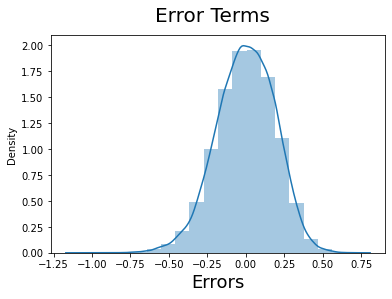

In [55]:
import seaborn as sns
y_train_price = lr_4.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [56]:
X.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'tempo'],
      dtype='object')

# Test df

In [57]:
drop_columns(df_test,to_be_deleted)#delete columns
scaler(df_test,to_be_scaled)
# df_test = make_dummies(df_train,dummies)

In [58]:
y_test = df_test.pop('valence')
X_test = df_test

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m4 = X_test_m4.drop(["liveness", "time_signature", "key"], axis = 1)

# Making predictions using the final model
y_pred_m4 = lr_4.predict(X_test_m4)

In [59]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m4)

0.4608996901822382

## Decision Trees

In [60]:
to_be_deleted

['id_artists', 'release_date', 'artists', 'name']

In [61]:
songs_for_dec_trees = songs.copy()
songs_for_dec_trees.set_index('id',inplace=True)
drop_columns(songs_for_dec_trees,to_be_deleted)#delete columns

In [62]:
from scipy import stats
songs_for_dec_trees[(np.abs(stats.zscore(songs_for_dec_trees)) < 5).all(axis=1)]

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
id,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,6,126903,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
07A5yehtSnoedViJAZkNnc,0,181640,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
08FmqUhxtyLTn6pAh6bk45,0,176907,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
08y9GfoqCWfOGsKdwojr5e,0,163080,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
0BRXJHRNGQ3W4v9frnSfhu,0,178933,0,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3sFgcM3PVMvJ95n7mQJTU4,31,240507,0,0.817,0.7990,9,-6.542,0,0.1040,0.426,0.000000,0.5030,0.7100,116.333,4
4KBULZasCMBDKHY8IPUCML,32,495840,0,0.270,0.3690,0,-18.636,1,0.0380,0.895,0.926000,0.1090,0.1400,83.685,4
6Vjk8MNXpQpi0F4BefdTyq,64,517125,0,0.483,0.6150,2,-8.538,1,0.0497,0.452,0.000414,0.0512,0.5940,80.576,3


In [63]:
songs_for_dec_trees["key"] = songs_for_dec_trees["key"].astype("category")
songs_for_dec_trees = pd.get_dummies(songs_for_dec_trees, columns=["key"])
songs_for_dec_trees.head()

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
id,,,,,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,6,126903,0,0.645,0.4450,-13.338,1,0.4510,0.674,0.7440,...,0,0,0,0,0,0,0,0,0,0
021ht4sdgPcrDgSk7JTbKY,0,98200,0,0.695,0.2630,-22.136,1,0.9570,0.797,0.0000,...,0,0,0,0,0,0,0,0,0,0
07A5yehtSnoedViJAZkNnc,0,181640,0,0.434,0.1770,-21.180,1,0.0512,0.994,0.0218,...,0,0,0,0,0,0,0,0,0,0
08FmqUhxtyLTn6pAh6bk45,0,176907,0,0.321,0.0946,-27.961,1,0.0504,0.995,0.9180,...,0,0,0,0,0,1,0,0,0,0
08y9GfoqCWfOGsKdwojr5e,0,163080,0,0.402,0.1580,-16.900,0,0.0390,0.989,0.1300,...,0,1,0,0,0,0,0,0,0,0


In [64]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(songs_for_dec_trees['valence'])
# Remove the labels from the features
# axis 1 refers to the columns
features= songs_for_dec_trees.drop('valence', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [65]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

## Choosing parameters for random forest

In [67]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }


## Training the reandom forest 

In [68]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()σ
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

SyntaxError: invalid syntax (Temp/ipykernel_6360/1669572368.py, line 3)

In [ ]:
rf_random.best_params_


{'n_estimators': 1155,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 64}

In [ ]:
def evaluate(model,test_features,test_labels):
    pred_labels = rf_random.predict(test_features)
    errors = abs(pred_labels-test_labels)
    mape  = 100*np.mean(errors/test_labels)
    accuracy = 100 - mape 
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
best_random = rf_random.best_estimator_
accuracy = evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 0.1256 degrees.
Accuracy = nan%.


C:\Users\3E30~1\AppData\Local\Temp/ipykernel_11300/4113939176.py:4: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\3E30~1\AppData\Local\Temp/ipykernel_11300/4113939176.py:4: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
rf_random.best_estimator_.feature_importances_

array([0.05342881, 0.08967856, 0.00972845, 0.35103526, 0.16559083,
       0.0478735 , 0.00452071, 0.05992432, 0.06115468, 0.03882459,
       0.03675878, 0.05793006, 0.00251497, 0.00229971, 0.00205085,
       0.00220773, 0.00086752, 0.00180717, 0.00184271, 0.00129811,
       0.00250143, 0.00122568, 0.00200703, 0.00145826, 0.00147029])

In [ ]:
features = songs_for_dec_trees.columns
importances = rf_random.best_estimator_.feature_importances_
indices = np.argsort(importances)

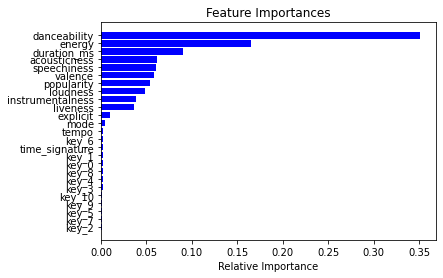

In [ ]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [ ]:
grid_search.fit(train_features, train_labels)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


# Getting audio features by hand 

In [ ]:
features = {}
all_ids = list(songs['id'].unique())

In [ ]:
all_ids = all_ids[:50]

In [ ]:
start = 0
num_tracks = 100
while start < len(all_ids):
    tracks_batch = all_ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

In [ ]:
features['08y9GfoqCWfOGsKdwojr5e']

{'danceability': 0.402,
 'energy': 0.158,
 'key': 3,
 'loudness': -16.9,
 'mode': 0,
 'speechiness': 0.039,
 'acousticness': 0.989,
 'instrumentalness': 0.13,
 'liveness': 0.311,
 'valence': 0.196,
 'tempo': 103.22,
 'type': 'audio_features',
 'id': '08y9GfoqCWfOGsKdwojr5e',
 'uri': 'spotify:track:08y9GfoqCWfOGsKdwojr5e',
 'track_href': 'https://api.spotify.com/v1/tracks/08y9GfoqCWfOGsKdwojr5e',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/08y9GfoqCWfOGsKdwojr5e',
 'duration_ms': 163080,
 'time_signature': 4}

* Same goes for audio analysis

In [ ]:
songs.set_index('id',inplace=True)

# Transforming the songs df

* Happily, there are no null values

In [ ]:
songs.isnull().sum().sum()

0

* Let's see the correlation matrix

In [ ]:
songs.corr().head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,0.068017,0.221485,0.174230,0.421826,0.015629,0.401100,-0.025974,-0.203112,-0.523182,-0.331180,-0.092587,0.070868,0.117471,0.124741
duration_ms,0.068017,1.000000,0.014210,-0.119541,0.041235,0.002192,0.013127,-0.041273,-0.076636,-0.084769,0.057585,0.041634,-0.188895,-0.016855,0.032463
explicit,0.221485,0.014210,1.000000,0.148855,0.164653,0.014788,0.173572,-0.049445,0.088101,-0.201147,-0.089201,0.010640,-0.024761,0.022358,0.044982
danceability,0.174230,-0.119541,0.148855,1.000000,0.209661,0.021170,0.233808,-0.036632,0.239694,-0.227301,-0.212250,-0.106658,0.559009,0.009072,0.160912
energy,0.421826,0.041235,0.164653,0.209661,1.000000,0.036293,0.773925,-0.056003,-0.109127,-0.767524,-0.192363,0.128748,0.343346,0.267106,0.192451


* Visualizing the corellation matrix with coolwarm cmap for the non dummy vairables

<AxesSubplot:>

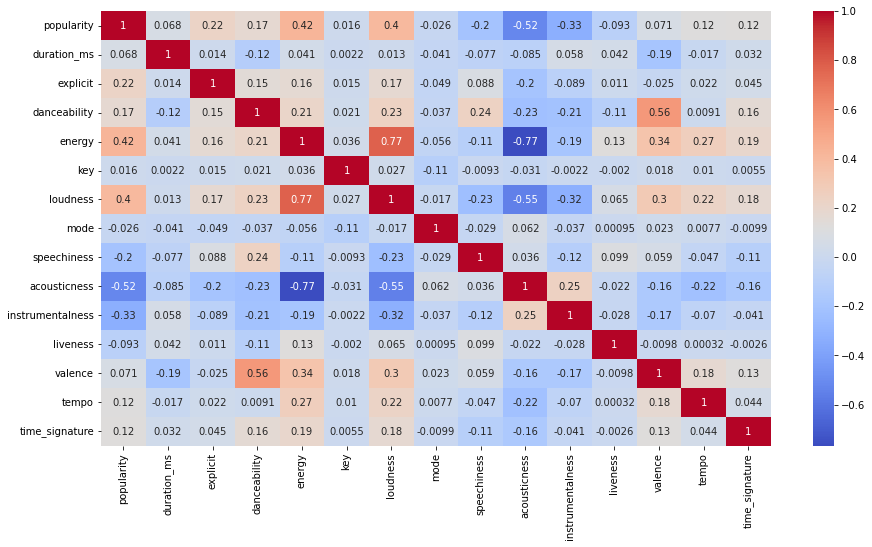

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(songs.corr(),annot=True, cmap='coolwarm')

* We notice that danceability, energy and loudness have the highest correlation with valence here
* Let's perform a regression using only danceability

### Valence-Danceability

In [ ]:
mod = smf.ols("valence ~ danceability+loudness+energy", data=songs)
songs_fitted = mod.fit()
songs_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.925e+04
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:48:15   Log-Likelihood:                 15138.
No. Observations:              100000   AIC:                        -3.027e+04
Df Residuals:                   99996   BIC:                        -3.023e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0038      0.004     -0.851      0.395      -0.013       0.005
danceability     0.7830      0.004    196.881      0.000       0.775       0.791
loudness        -0.0006      0.000     -3.320      0.001      -0.001      -0.000
energy           0.2399      0.004     61.960      0.000       0.232       0.247
==============================================================================
Omnibus:                      698.657   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.611
Skew:                          -0.191   Prob(JB):                    8.91e-152
Kurtosis:                       2.856   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression

* Multicollinearity 

* There are some columns that add no value to our model 

In [ ]:
songs.drop(['id_artists', 'release_date','artists','name','duration_ms'], axis=1, inplace=True)

In [ ]:
# import random
# random_numbers = [0]*len(songs)

# for i in range(len(random_numbers)):
#     random_numbers[i] = random.uniform(0, 1)

In [ ]:
# songs['random_number'] = random_numbers

In [ ]:
x = songs['valence']
del songs["valence"]
songs['valence'] = x

In [ ]:
songs.columns

Index(['popularity', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'tempo', 'time_signature', 'valence'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(songs.iloc[:, 0:-1])
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns)

const               160.445643
popularity            1.641264
explicit              1.100238
danceability          1.267928
energy                4.755753
key                   1.013689
loudness              3.142855
mode                  1.023352
speechiness           1.367432
acousticness          2.949885
instrumentalness      1.328335
liveness              1.092745
tempo                 1.085152
time_signature        1.073771
dtype: float64

* We notice that all the variable's VIF is lower than 5 except energy.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats.stats as stats

%matplotlib inline

* Finding the best model with subset selection

* Stepwise Selection

In [ ]:
songs

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,valence
id,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,6,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,104.851,3,0.127
021ht4sdgPcrDgSk7JTbKY,0,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,102.009,1,0.655
07A5yehtSnoedViJAZkNnc,0,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,130.418,5,0.457
08FmqUhxtyLTn6pAh6bk45,0,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,169.980,3,0.397
08y9GfoqCWfOGsKdwojr5e,0,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,103.220,4,0.196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3sFgcM3PVMvJ95n7mQJTU4,31,0,0.817,0.7990,9,-6.542,0,0.1040,0.426,0.000000,0.5030,116.333,4,0.710
4KBULZasCMBDKHY8IPUCML,32,0,0.270,0.3690,0,-18.636,1,0.0380,0.895,0.926000,0.1090,83.685,4,0.140
6Vjk8MNXpQpi0F4BefdTyq,64,0,0.483,0.6150,2,-8.538,1,0.0497,0.452,0.000414,0.0512,80.576,3,0.594


## Adding square to independent variables

In [ ]:
best_model.model.exog_names

['intercept',
 'danceability',
 'energy',
 'acousticness',
 'tempo',
 'explicit',
 'popularity',
 'instrumentalness',
 'speechiness',
 'loudness',
 'mode_1',
 'key_9',
 'key_5',
 'time_signature_4',
 'time_signature_0',
 'key_6',
 'key_1',
 'time_signature_5',
 'liveness',
 'key_7',
 'key_2',
 'key_8',
 'key_11',
 'key_4']

In [ ]:
best_independents=""
counter = 0 
for i in best_model.model.exog_names:
    if i!= 'intercept':
        if len(best_independents) == 0:
            best_independents = best_independents + str(i)
        else:
            best_independents = best_independents+ '+' + i

In [ ]:
independents_seperately = best_independents.split("+")

In [ ]:
best_adjusted =  best_model.rsquared_adj
for i in independents_seperately:
    for j in range(2,5):
        string_to_be_tested = best_independents
        string_with_one_independend_squared = string_to_be_tested+' +np.power('+i+', '+str(j)+')'
        mod = smf.ols("valence~"+string_with_one_independend_squared, data=songs)
        current_model = mod.fit()
        if current_model.rsquared_adj > best_adjusted:
            print(current_model.rsquared_adj)

            best_adjusted = current_model.rsquared_adj 
            best_independents = best_independents +' +np.power('+i+', '+str(j)+')'

0.45450025438765596
0.45483714744779624
0.4548791400257486
0.4827402858049753
0.48297573736781607
0.48434063842369357
0.48460428758821705
0.4897133245292269
0.49908322159629037
0.4992509521471069
0.5006869301897992
0.5050272661140064
0.5055147600336214
0.5070743265157502
0.5070974749276911
0.5072316577793515
0.5074735960604545
0.5075034782261316
0.5078197609569073
0.507854988779116
0.5078549887791164
0.5078549887791168
0.5078549887791173
0.5094138741393097
0.5095019785848962
0.510547361918335


## Trying to multiply independent variables

In [ ]:
best_independents

'danceability+energy+acousticness+tempo+explicit+popularity+instrumentalness+speechiness+loudness+mode_1+key_9+key_5+time_signature_4+time_signature_0+key_6+key_1+time_signature_5+liveness+key_7+key_2+key_8+key_11+key_4 +np.power(danceability, 2) +np.power(danceability, 3) +np.power(danceability, 4) +np.power(energy, 2) +np.power(energy, 3) +np.power(energy, 4) +np.power(acousticness, 2) +np.power(acousticness, 3) +np.power(tempo, 2) +np.power(tempo, 3) +np.power(tempo, 4) +np.power(popularity, 2) +np.power(popularity, 3) +np.power(popularity, 4) +np.power(instrumentalness, 2) +np.power(instrumentalness, 3) +np.power(instrumentalness, 4) +np.power(speechiness, 2) +np.power(speechiness, 3) +np.power(speechiness, 4) +np.power(mode_1, 2) +np.power(key_9, 2) +np.power(time_signature_4, 2) +np.power(liveness, 2) +np.power(liveness, 3) +np.power(liveness, 4)'

In [ ]:
independents_seperately

['danceability',
 'energy',
 'acousticness',
 'tempo',
 'explicit',
 'popularity',
 'instrumentalness',
 'speechiness',
 'loudness',
 'mode_1',
 'key_9',
 'key_5',
 'time_signature_4',
 'time_signature_0',
 'key_6',
 'key_1',
 'time_signature_5',
 'liveness',
 'key_7',
 'key_2',
 'key_8',
 'key_11',
 'key_4']

In [ ]:
for i in range(len(independents_seperately[:-1])):
    print(independents_seperately[i])

danceability
energy
acousticness
tempo
explicit
popularity
instrumentalness
speechiness
loudness
mode_1
key_9
key_5
time_signature_4
time_signature_0
key_6
key_1
time_signature_5
liveness
key_7
key_2
key_8
key_11


In [ ]:
# for i in range(len(independents_seperately[:-5])):
#         string_to_be_tested = best_independents
#         string_with_one_independend_squared = string_to_be_tested+'+'+independents_seperately[i]+'*'+independents_seperately[i+1]
#         print(string_with_one_independend_squared)
#         mod = smf.ols("valence~"+string_with_one_independend_squared, data=songs)
#         current_model = mod.fit()
#         if current_model.rsquared_adj > best_adjusted:
#             print(current_model.rsquared_adj)

#             best_adjusted = current_model.rsquared_adj 
#             best_independents = best_independents +'+'+independents_seperately[i]+'*'+independents_seperately[i+1]

In [ ]:
mod = smf.ols("valence ~ "+best_independents, data=songs)
blood_res = mod.fit()
blood_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     2269.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:27:31   Log-Likelihood:                 28095.
No. Observations:              100000   AIC:                        -5.610e+04
Df Residuals:                   99953   BIC:                        -5.565e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.4516      0.016    -27.469      0.000      -0.484      -0.419
danceability                      0.1795      0.143      1.257      0.209      -0.100       0.459
energy                            2.0530      0.050     40.952      0.000       1.955       2.151
acousticness                      0.5947      0.017     34.011      0.000       0.560       0.629
tempo                             0.0068      0.001      5.787      0.000       0.004       0.009
explicit                         -0.1105      0.003    -32.750      0.000      -0.117      -0.104
popularity                       -0.0048      0.000    -14.621      0.000      -0.005      -0.004
instrumentalness                 -0.3807      0.038     -9.921      0.000      -0.456      -0.306
speechiness                       0.0575      0.056      1.020      0.308      -0.053       0.168
loudness                         -0.0505      0.001    -43.366      0.000      -0.053      -0.048
mode_1                            0.0093      0.001     14.409      0.000       0.008       0.011
key_9                             0.0044      0.001      4.069      0.000       0.002       0.007
key_5                             0.0096      0.002      4.406      0.000       0.005       0.014
time_signature_4                  0.0031      0.001      3.476      0.001       0.001       0.005
time_signature_0                  0.7644      0.062     12.234      0.000       0.642       0.887
key_6                            -0.0108      0.003     -3.816      0.000      -0.016      -0.005
key_1                            -0.0051      0.002     -2.096      0.036      -0.010      -0.000
time_signature_5                 -0.0008      0.004     -0.197      0.844      -0.009       0.007
liveness                         -0.6820      0.057    -12.022      0.000      -0.793      -0.571
key_7                             0.0033      0.002      1.627      0.104      -0.001       0.007
key_2                         -4.624e-05      0.002     -0.022      0.983      -0.004       0.004
key_8                            -0.0040      0.003     -1.542      0.123      -0.009       0.001
key_11                           -0.0040      0.003     -1.494      0.135      -0.009       0.001
key_4                            -0.0070      0.002     -2.912      0.004      -0.012      -0.002
np.power(danceability, 2)         2.5763      0.477      5.404      0.000       1.642       3.511
np.power(danceability, 3)        -3.2680      0.656     -4.982      0.000      -4.554      -1.982
np.power(danceability, 4)         1.2568      0.318      3.957      0.000       0.634       1.879
np.power(energy, 2)              -3.7452      0.189    -19.852      0.000      -4.115      -3.375
np.power(energy, 3)               4.6643     

# Q2

### regression model from website 

In [ ]:
songs

,popularity,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,...,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,valence
id,,,,,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,6,0,0.645,0.4450,-0.292329,0.4510,0.674,0.744000,0.1510,-0.384809,...,0,0,0,1,0,0,1,0,0,0.127
021ht4sdgPcrDgSk7JTbKY,0,0,0.695,0.2630,-1.878154,0.9570,0.797,0.000000,0.1480,-0.479010,...,0,0,0,1,0,1,0,0,0,0.655
07A5yehtSnoedViJAZkNnc,0,0,0.434,0.1770,-1.705836,0.0512,0.994,0.021800,0.2120,0.462628,...,0,0,0,1,0,0,0,0,1,0.457
08FmqUhxtyLTn6pAh6bk45,0,0,0.321,0.0946,-2.928100,0.0504,0.995,0.918000,0.1040,1.773941,...,0,0,0,1,0,0,1,0,0,0.397
08y9GfoqCWfOGsKdwojr5e,0,0,0.402,0.1580,-0.934373,0.0390,0.989,0.130000,0.3110,-0.438870,...,0,0,1,0,0,0,0,1,0,0.196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3sFgcM3PVMvJ95n7mQJTU4,31,0,0.817,0.7990,0.932639,0.1040,0.426,0.000000,0.5030,-0.004230,...,0,0,1,0,0,0,0,1,0,0.710
4KBULZasCMBDKHY8IPUCML,32,0,0.270,0.3690,-1.247285,0.0380,0.895,0.926000,0.1090,-1.086373,...,0,0,0,1,0,0,0,1,0,0.140
6Vjk8MNXpQpi0F4BefdTyq,64,0,0.483,0.6150,0.572863,0.0497,0.452,0.000414,0.0512,-1.189423,...,0,0,0,1,0,0,1,0,0,0.594


## REGRESSION MODEL

In [ ]:
songs.head()

,popularity,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,...,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,valence
id,,,,,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,6,0,0.645,0.4450,-0.292329,0.4510,0.674,0.7440,0.151,-0.384809,...,0,0,0,1,0,0,1,0,0,0.127
021ht4sdgPcrDgSk7JTbKY,0,0,0.695,0.2630,-1.878154,0.9570,0.797,0.0000,0.148,-0.479010,...,0,0,0,1,0,1,0,0,0,0.655
07A5yehtSnoedViJAZkNnc,0,0,0.434,0.1770,-1.705836,0.0512,0.994,0.0218,0.212,0.462628,...,0,0,0,1,0,0,0,0,1,0.457
08FmqUhxtyLTn6pAh6bk45,0,0,0.321,0.0946,-2.928100,0.0504,0.995,0.9180,0.104,1.773941,...,0,0,0,1,0,0,1,0,0,0.397
08y9GfoqCWfOGsKdwojr5e,0,0,0.402,0.1580,-0.934373,0.0390,0.989,0.1300,0.311,-0.438870,...,0,0,1,0,0,0,0,1,0,0.196


In [ ]:
x = songs.drop(['valence'],axis=1).values
y = songs['valence'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
varModel=VarianceThreshold(threshold=0)
varModel.fit(x_train)
constArr=varModel.get_support()
constArr
import collections
collections.Counter(constArr)

Counter({True: 29})

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, y_pred_train))

Coefficients: [-9.00136241e-04 -1.34993939e-01  8.62973751e-01  5.27630005e-01
 -2.67644566e-02 -7.53956306e-02  2.17508407e-01 -6.70308399e-02
 -1.73341261e-02  3.22272055e-02  1.48538575e-03 -1.10125114e-02
  4.46819940e-03  3.57280229e-04 -2.95602218e-03  1.37575509e-02
 -1.24653508e-02  5.02603881e-03 -7.30625030e-03  1.36840019e-02
  9.70868870e-04 -6.00919113e-03 -1.13757239e-02  1.13757239e-02
  7.54271414e-02 -1.95699649e-02 -1.53938803e-02 -8.19634902e-03
 -3.22669471e-02]
Intercept: -0.23242324846343998
Mean squared error (MSE): 0.04
Coefficient of determination (R^2): 0.45


In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred_test))

Coefficients: [-9.00136241e-04 -1.34993939e-01  8.62973751e-01  5.27630005e-01
 -2.67644566e-02 -7.53956306e-02  2.17508407e-01 -6.70308399e-02
 -1.73341261e-02  3.22272055e-02  1.48538575e-03 -1.10125114e-02
  4.46819940e-03  3.57280229e-04 -2.95602218e-03  1.37575509e-02
 -1.24653508e-02  5.02603881e-03 -7.30625030e-03  1.36840019e-02
  9.70868870e-04 -6.00919113e-03 -1.13757239e-02  1.13757239e-02
  7.54271414e-02 -1.95699649e-02 -1.53938803e-02 -8.19634902e-03
 -3.22669471e-02]
Intercept: -0.23242324846343998
Mean squared error (MSE): 0.04
Coefficient of determination (R^2): 0.46


Text(0.5, 1.0, 'Actual vs Predicted')

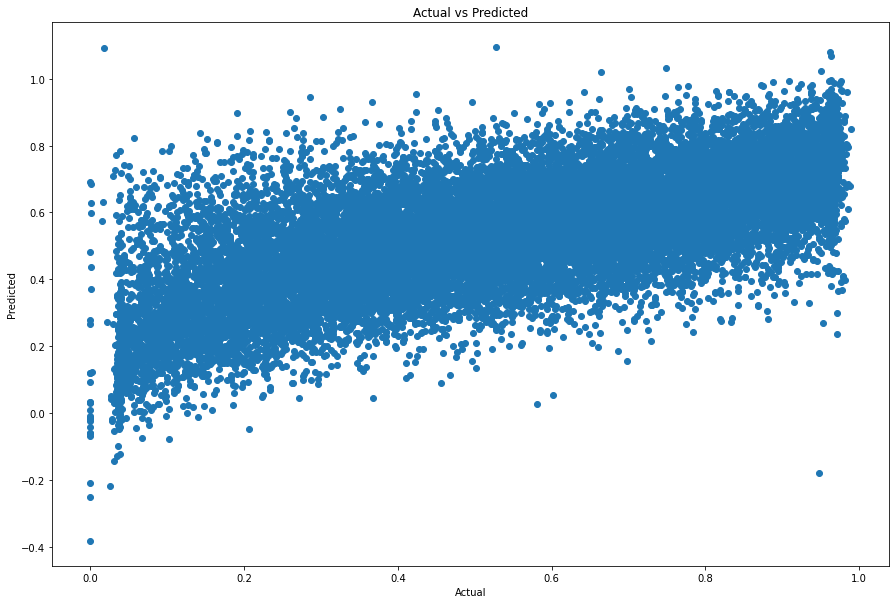

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

C:\Users\Νίκος\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Errors')

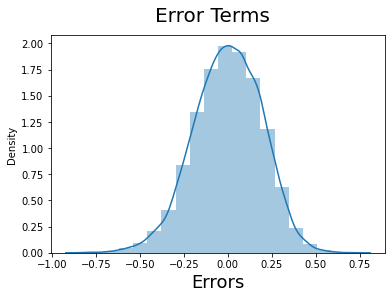

In [ ]:

import seaborn as sns
y_train_price = model.predict(x_train)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [ ]:
pred_y_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_test, 'Difference': y_test-y_pred_test,'Difference':y_test-y_pred_test})
pred_y_df[0:20].sort_values(by='Difference')

,Actual Value,Predicted Value,Difference
1,0.258,0.767148,-0.509148
18,0.160,0.589281,-0.429281
6,0.423,0.843071,-0.420071
19,0.293,0.511571,-0.218571
14,0.148,0.294586,-0.146586
2,0.282,0.414850,-0.132850
3,0.254,0.384288,-0.130288
8,0.447,0.540224,-0.093224
16,0.648,0.541846,0.106154
13,0.564,0.436768,0.127232
